In [15]:
import bioframe
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [4]:
CTCF_ChIP_seq_CTCF_AID_auxin2days_rep1 = '/scratch/pokorny/Elphege_2017/GSM2609186_CTCF_ChIP-seq_CTCF-AID_auxin2days_rep1_ENC125_Peaks.bed'
CTCF_ChIP_exo_WT_untagged_auxin2days_rep1 = '/scratch/pokorny/Elphege_2017/GSM2609196_CTCF_ChIP-exo_WT-untagged_auxin2days_rep1_ENC2_Peaks.bed'

# Read the files into tables
ctcf_auxin2days = bioframe.read_table(CTCF_ChIP_seq_CTCF_AID_auxin2days_rep1, schema='bed')
wt_auxin2days = bioframe.read_table(CTCF_ChIP_exo_WT_untagged_auxin2days_rep1, schema='bed')

In [6]:
ctcf_auxin2days[0:5]

,chrom,start,end,name,score,strand
0,chr1,4322655,4322855,NaN,NaN,NaN
1,chr1,4336363,4336563,NaN,NaN,NaN
2,chr1,4758529,4758729,NaN,NaN,NaN
3,chr1,4760048,4760248,NaN,NaN,NaN
4,chr1,6408056,6408256,NaN,NaN,NaN


In [7]:
wt_auxin2days[0:5]

,chrom,start,end,name,score,strand
0,chr1,3002702,3002902,NaN,NaN,NaN
1,chr1,3053590,3053790,NaN,NaN,NaN
2,chr1,3107612,3107812,NaN,NaN,NaN
3,chr1,3278540,3278740,NaN,NaN,NaN
4,chr1,3315378,3315578,NaN,NaN,NaN


# Creating summary of these files

## Counting number of chromosomes represented, how many peaks in each chromosome, genomic intervals between each

In [8]:
# counting unique values for chromosome column
print("Number of chromosomes represented by data: " + str(pd.unique(ctcf_auxin2days['chrom']).size))

print("Chromosomes: ")
print(*pd.unique(ctcf_auxin2days['chrom']))

Number of chromosomes represented by data: 20
Chromosomes: 
chr1 chr2 chr3 chr4 chr5 chr6 chr7 chr8 chr9 chrX chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19


## Comparing transcripts present in WT to CTCF-knockout



In [9]:
overlap = bioframe.overlap(ctcf_auxin2days,wt_auxin2days, suffixes=('_ctcf','_wt'))

In [ ]:
wt_exclusive = bioframe.subtract(wt_auxin2days, ctcf_auxin2days)

ctcf_exclusive = bioframe.subtract(ctcf_auxin2days, wt_auxin2days)

Number of shared regions: 19876
Number of regions in WT only: 117797
Number of regions in -CTCF only: 13977


<function matplotlib.pyplot.show(close=None, block=None)>

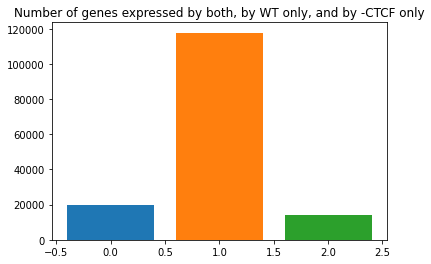

In [78]:
print('Number of shared regions: {}'.format(len(overlap)))
print('Number of regions in WT only: {}'.format(len(wt_exclusive)))
print('Number of regions in -CTCF only: {}'.format(len(ctcf_exclusive)))

plt.bar(0, len(overlap), width=0.8)
plt.bar(1, len(wt_exclusive), width=0.8)
plt.bar(2, len(ctcf_exclusive), width=0.8)
plt.title('Number of genes expressed by both, by WT only, and by -CTCF only')

plt.show

In [79]:
count_overlap = 

# todo: histogram graph of number of overlapping regions between the two
## could also do no of overlapping regions within a set? maybe these ones with lots of overlaps are special kind of genes? 

NameError: name 'df1' is not defined

# Questions: 
 * Does this mean that 13977 genes had gained expression by inducing CTCF-degradation? 
 ** Why? (todo: Re-read Nora to see what they had to say about these)
 * Is there a better way to display these as aggregate data?
 ** I thought maybe displaying a histogram of - vs + genes, but had trouble figuring an interval to measuring the values over (I thought TAD boundaries, but wouldn't load). 

In [41]:
# Importing TSS annotations
tssfile = '/scratch/pokorny/genomic_annotations/refTSS_v3.3/refTSS_v3.3_human_coordinate.hg38.bed'

tss_intervals = pd.read_table(tssfile, header=None, usecols=[0,1,2], names=['chrom', 'start', 'end'])

display(tss_intervals)
# turn into valid bedframe
bioframe.is_bedframe(tss_intervals)

,chrom,start,end
0,chr1,16013,16020
1,chr1,29346,29366
2,chr1,36521,36538
3,chr1,186535,186542
4,chr1,199862,199882
...,...,...,...
224689,chrY,26409204,26409213
224690,chrY,26671129,26671136
224691,chrY,56734794,56734819
224692,chrY,56827678,56827684


True

# Comparing genes differentially regulated -CTCF to TSS

Note: Here, assumption is that genes present only in WT cell line transcripts (i.e. not in shared subset) are downregulated by loss of CTCF and genes present only in -CTCF cell line transcripts are upregulated by loss of CTCF.

In [55]:
import numpy as np

In [53]:
# Comparing genes upregulated in -CTCF to TSS
closest_ctcf = bioframe.closest(ctcf_exclusive, tss_intervals, suffixes=('_ctcf','_tss'))
closest_wt = bioframe.closest(wt_exclusive, tss_intervals, suffixes=('_wt', '_tss'))
display(closest_wt[closest_wt['distance']<1000])
print('Percentage of genes downregulated by CTCF loss within 1000bp of TSS:')
print(closest_wt[closest_wt['distance']<1000].size / wt_exclusive.size)
print('Percentage of genes upregulated by CTCF loss within 1000bp of TSS:')
print(closest_ctcf[closest_ctcf['distance']<1000].size / ctcf_exclusive.size)

,chrom_wt,start_wt,end_wt,name_wt,score_wt,strand_wt,chrom_tss,start_tss,end_tss,distance
9,chr1,3530904,3531104,NaN,NaN,NaN,chr1,3531337,3531346,233
15,chr1,3921347,3921547,NaN,NaN,NaN,chr1,3922228,3922231,681
67,chr1,5118557,5118757,NaN,NaN,NaN,chr1,5118809,5118812,52
78,chr1,5373991,5374191,NaN,NaN,NaN,chr1,5373358,5373359,632
84,chr1,5829466,5829666,NaN,NaN,NaN,chr1,5830609,5830613,943
...,...,...,...,...,...,...,...,...,...,...
117312,chrX,154440278,154440478,NaN,NaN,NaN,chrX,154440344,154440365,0
117314,chrX,154479843,154480043,NaN,NaN,NaN,chrX,154479253,154479291,552
117316,chrX,154515521,154515721,NaN,NaN,NaN,chrX,154516110,154516168,389
117351,chrX,155880167,155880367,NaN,NaN,NaN,chrX,155881307,155881384,940


Percentage of genes downregulated by CTCF loss within 1000bp of TSS:
0.10735983655497734
Percentage of genes upregulated by CTCF loss within 1000bp of TSS:
0.10243018291955833


Text(0, 0.5, 'Number of transcripts detected')

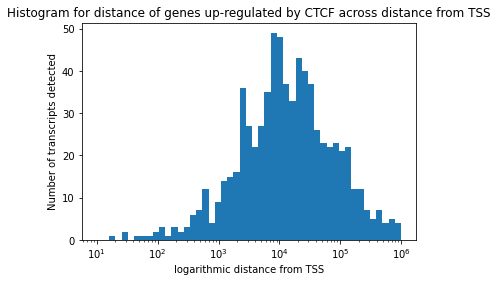

In [71]:
chr1_ctcf_data = closest_ctcf[closest_ctcf['chrom_ctcf']=='chr1']['distance']

MIN, MAX = 10.0, 1000000.0

plt.figure()
plt.hist(chr1_ctcf_data, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.gca().set_xscale("log")
plt.title('Histogram for distance of genes up-regulated by CTCF across distance from TSS')
plt.xlabel('logarithmic distance from TSS')
plt.ylabel('Number of transcripts detected')

Text(0, 0.5, 'Number of transcripts detected')

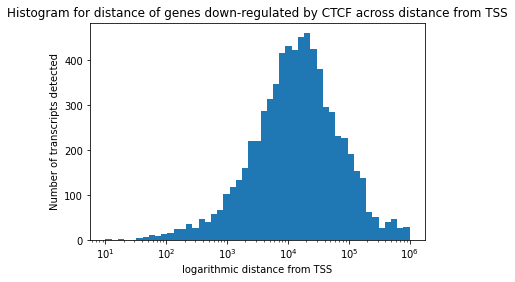

In [72]:
chr1_wt_data = closest_wt[closest_wt['chrom_wt']=='chr1']['distance']

plt.figure()
plt.hist(chr1_wt_data, bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.gca().set_xscale("log")
plt.title('Histogram for distance of genes down-regulated by CTCF across distance from TSS')
plt.xlabel('logarithmic distance from TSS')
plt.ylabel('Number of transcripts detected')

# Todo/ Up Next

* Get -cohesin RNAseq data and compare to -CTCF
* download Nora2017 in supTable 4 and extract the positions from the excel file, look at the distances between those and CTCF.
* Replicate Nora2017 Fig. 6c-d: 
** 1. Fig 6c --> need to download annotation for CTCF binding sites on top to recreate this (look into Smc1a HiChIP loop anchors "Gene misregulated upon CTCF depletion are more often found close to Smc1a HiChIP loop anchors than expected by chance. See STAR Methods for statistical details")
** 2. Fig. 6d --> need to download enhancer annotation

# For fun, attempted mapping shared vs exclusive genes per TAD regions (failed attempt)

In [ ]:
# downloaded regions from Dixon 2012, GSE35156
## note: nevermind, I think trying to load this with pandas kept crashing the kernel? The file has 120423486 rows :0

# f = '/scratch/pokorny/Dixon_2012/GSE35156_GSM862723_hESC_HindIII_HiC.nodup.summary.txt'

# boundary_regions = pd.read_table(f)
# boundary_regions[0:10]